<a href="https://colab.research.google.com/github/Mariyaben/Convolutional_Neural_Networks/blob/main/CNN_using_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import tensorflow as tf
import os

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Image.zip to Image.zip


In [4]:
!unzip Image.zip -d .


Archive:  Image.zip
   creating: ./Image classification using CNN/data/
   creating: ./Image classification using CNN/data/angry/
  inflating: ./Image classification using CNN/data/angry/1000_F_203184837_CqF7GybuLkhRpNMuHbZ8ASyUaTY2VO0X.jpg  
  inflating: ./Image classification using CNN/data/angry/1000_F_254492347_zxINhzgt4WRKZqf6lPRFH32s1uJ526es.jpg  
  inflating: ./Image classification using CNN/data/angry/116999ecb25ac04c42cdac0a91c578439f-29-angry-face.rsocial.w1200.jpg  
  inflating: ./Image classification using CNN/data/angry/14COxhee3vteSZVToj3_9xQ.jpeg  
  inflating: ./Image classification using CNN/data/angry/160087355.jpg  
  inflating: ./Image classification using CNN/data/angry/17377054-close-up-image-of-man-gesturing-an-angry-face-against-white-background.jpg  
  inflating: ./Image classification using CNN/data/angry/17625502-woman-with-angry-face-on-white-background.jpg  
  inflating: ./Image classification using CNN/data/angry/18a18a14a244a3cb33251965df5b7b2f.jpg  
  in

In [5]:
import cv2
import imghdr

In [6]:
data_dir='Img/data'

In [7]:
os.listdir(data_dir)

['angry', 'happy']

In [8]:
image_exts=['jpg','jpeg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}' .format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))


Image not in ext list Img/data/angry/116999ecb25ac04c42cdac0a91c578439f-29-angry-face.rsocial.w1200.jpg
Image not in ext list Img/data/angry/angry-man-260nw-172757603.jpg
Image not in ext list Img/data/angry/2560px-Child27s_Angry_Face.jpg
Image not in ext list Img/data/angry/depositphotos_223033032-stock-photo-angry-screaming-young-girl-portrait.jpg
Image not in ext list Img/data/angry/-set-emojis-emoticon-mad-evil-angry-and-cruel-red-icon-collection-2011999415.jpg
Image not in ext list Img/data/angry/depositphotos_192398186-stock-photo-beautiful-angry-woman-makeup-white.jpg
Image not in ext list Img/data/angry/depositphotos_647346900-stock-illustration-angry-face-emoji-cute-emoticon.jpg
Image not in ext list Img/data/angry/child-angry-face-arms-crossed-600nw-2317523715.jpg
Image not in ext list Img/data/angry/depositphotos_8841913-stock-photo-angry-woman.jpg
Image not in ext list Img/data/angry/angry-face3.gif
Image not in ext list Img/data/angry/vector-emoji-angry-face-cute-260nw-192

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [30]:
data = tf.keras.utils.image_dataset_from_directory('Img/data')

Found 169 files belonging to 2 classes.


In [31]:
data_iterator = data.as_numpy_iterator

In [32]:
data_iterator

<bound method DatasetV2.as_numpy_iterator of <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>>

In [33]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [34]:
batch[0].shape

(32, 256, 256, 3)

In [35]:
batch[1]

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int32)

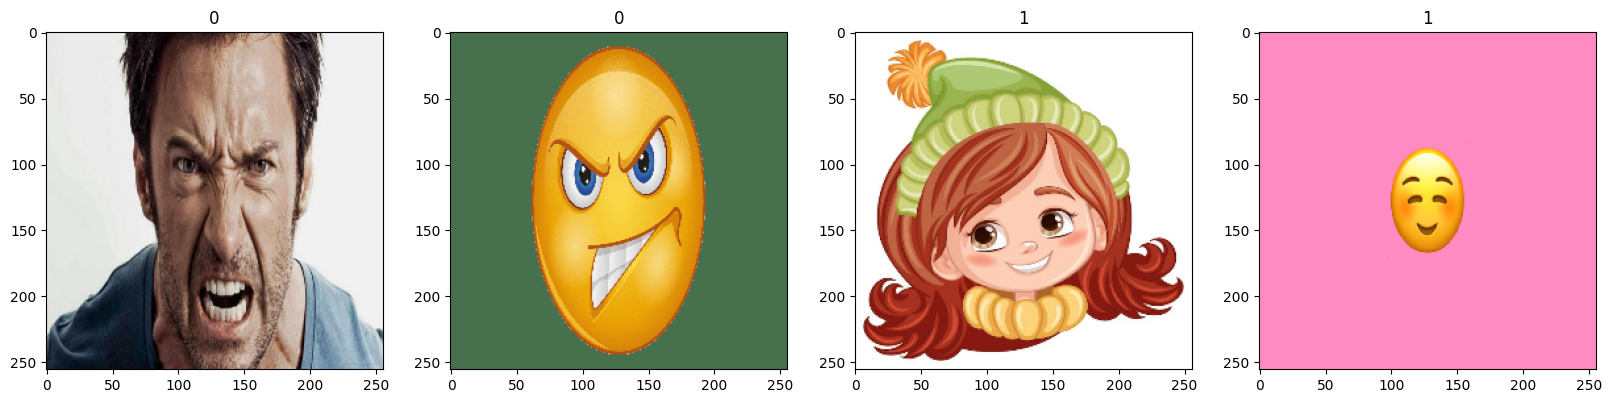

In [36]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [37]:
data = data.map(lambda x, y: (x/255,y))

In [38]:
scaled_iterator = data.as_numpy_iterator()

In [39]:
batch = scaled_iterator.next()

In [41]:
batch[0].max()

1.0

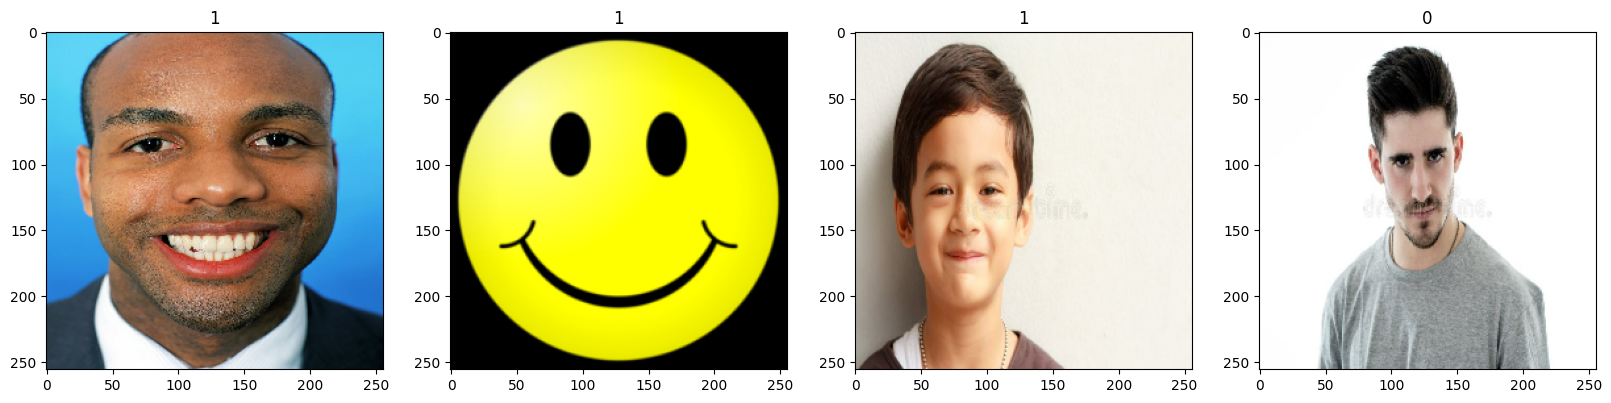

In [42]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [50]:
len(data)

6

In [61]:
train_size = int(len(data)*.7)
val_size  = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [62]:
train_size+val_size+test_size

6

In [63]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [69]:
len(test)

1

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [72]:
model = Sequential()

In [73]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation ='sigmoid'))


In [74]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)       

In [76]:
logdir = 'Img/logs'

In [77]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [78]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=tensorboard_callback)

Epoch 1/20
4/4 [==============================] - 14s 3s/step - loss: 1.0532 - accuracy: 0.5625 - val_loss: 0.7008 - val_accuracy: 0.5312
Epoch 2/20
4/4 [==============================] - 11s 2s/step - loss: 0.6571 - accuracy: 0.5859 - val_loss: 0.6982 - val_accuracy: 0.4688
Epoch 3/20
4/4 [==============================] - 11s 3s/step - loss: 0.6557 - accuracy: 0.6484 - val_loss: 0.5905 - val_accuracy: 0.7188
Epoch 4/20
4/4 [==============================] - 13s 3s/step - loss: 0.6027 - accuracy: 0.7188 - val_loss: 0.6109 - val_accuracy: 0.6250
Epoch 5/20
4/4 [==============================] - 12s 2s/step - loss: 0.5636 - accuracy: 0.7578 - val_loss: 0.5679 - val_accuracy: 0.5938
Epoch 6/20
4/4 [==============================] - 12s 3s/step - loss: 0.6069 - accuracy: 0.6016 - val_loss: 0.5913 - val_accuracy: 0.7188
Epoch 7/20
4/4 [==============================] - 13s 3s/step - loss: 0.5161 - accuracy: 0.7500 - val_loss: 0.5302 - val_accuracy: 0.7812
Epoch 8/20
4/4 [==================

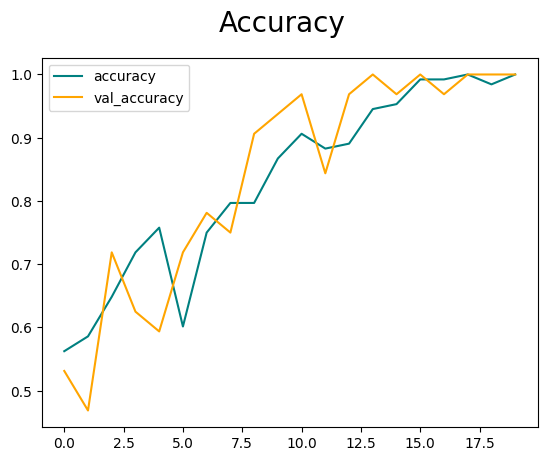

In [81]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [83]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [84]:
precision = Precision()
recall = Recall()
binary_accuracy = BinaryAccuracy()

In [85]:
len(test)

1

In [86]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  precision.update_state(y,yhat)
  recall.update_state(y, yhat)
  binary_accuracy.update_state(y, yhat)


1/1 [==============================] - 0s 250ms/step


In [88]:
print(precision.result().numpy(), recall.result().numpy(), binary_accuracy.result().numpy())

1.0 1.0 1.0


<function matplotlib.pyplot.show(close=None, block=None)>

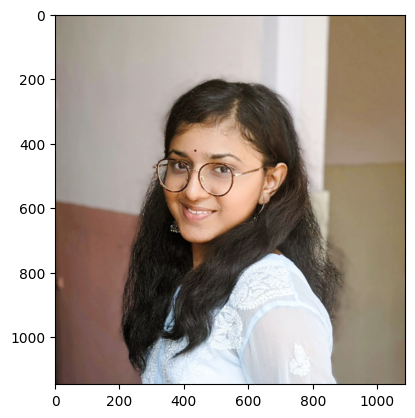

In [94]:
img = cv2.imread('mariya.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

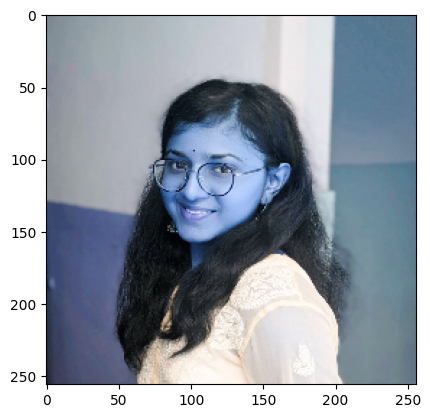

In [98]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [99]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [100]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 35ms/step


In [101]:
yhat

array([[0.8254838]], dtype=float32)

In [103]:
if yhat > 0.5:
  print(f'Person is smiling :)')
else:
  print(f'Person is angry)')

Person is smiling :)
